# System simulation

1. https://en.wikipedia.org/wiki/Interval_(music)

In [1]:
import os
import sys
import subprocess

from numpy import *
from matplotlib.pyplot import *
from scipy import signal
import scipy.io.wavfile

In [19]:
def resampler(x, L, M, N):
    """
    Parameters:
    x = Input signal
    L = Interpolation rate
    M = Decimation rate
    N = Sub-filter length
    
    Returns:
    y = Resampled version of x
    """
    
    # Prototype filter for combined anti-aliasing and reconstruction.
    h = signal.firwin(N*L, 0.8*min([1/L, 1/M]))

    y = zeros((L*len(x))//M)
    for m in range(0, len(y)):
        n = (m*M) // L
        k = (m*M) % L
        
        if n >= len(x) - 1:
            break

        for l in range(N):
            # Skip unknown input samples
            if n-l < 0:
                continue

            y[m] += L * h[l*L + k] * x[n - l]

    return array(y, dtype=float)

In [10]:
def get_input_sine():
    fs = 44100
    f = 440
    t = arange(int(1.0 * fs))/fs
    x = sin(2*pi*f*t)
    return x, fs

def get_input_file():
    fs, x = scipy.io.wavfile.read("../app/sound/piano_c4.wav")
    x = array(x, dtype=float)
    return x, fs

#x, fs = get_input_sine()
x, fs = get_input_file()

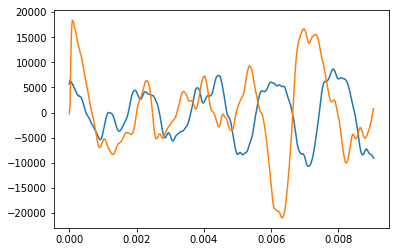

In [29]:
# Apply resampling
y1 = resampler(x, 16, 9, 4)
y2 = zeros(len(y1)) # resampler(x, 6, 5, 4)
y3 = zeros(len(y1)) # resampler(x, 8, 9, 4)

L = min([len(y1), len(y2), len(y3)])
y = y1[:L] + y2[:L] + y3[:L]

# Visualize transposition
t = arange(max([len(x), len(y)])) / fs
N = int(4*fs/440)

plot(t[:N], x[:N], "-", label="x");
plot(t[:N], y[:N], "-", label="y");

In [30]:
# Play output
scipy.io.wavfile.write("y.wav", fs, array(y, dtype=int16))
#subprocess.check_output(["vlc", "y.wav"]);

In [18]:
# Play input+output
N = min([len(x), len(y)])
xy = x[:N]/2 + y[:N]/2
scipy.io.wavfile.write("xy.wav", fs, array(xy, dtype=int16))
#subprocess.check_output(["vlc", "xy.wav"]);

In [17]:
# Play input
scipy.io.wavfile.write("x.wav", fs, array(x, dtype=int16))
#subprocess.check_output(["vlc", "x.wav"]);